# 6.5 Unsupervides Machine Learning

## This script contains the following:

### 1. Importing libraries and data

### 2. The elbow technique

### 3. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a path

path=r'C:\Users\carol\Documents\Airbnb'

In [9]:
# upload the dataset

df=pd.read_csv(os.path.join(path,'Prepared Data','df_listings_subset.csv'))
df2=pd.read_csv(os.path.join(path,'Prepared Data','df_listings_merged3.csv'))

In [10]:
df2.columns

Index(['Unnamed: 0', 'listing_id', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name_x', 'description', 'neighborhood_overview',
       'picture_url', 'host_id_x', 'host_url', 'host_name_x', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_x', 'neighbourhood_x.1', 'district_x', 'latitude_x',
       'longitude_x', 'property_type', 'room_type_x', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price_x', 'minimum_nights_x', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nig

In [11]:
#Rename values

df2.rename(columns={'price_y':'price','accommodates':'#_guests','number_of_reviews_y':'#_reviews'},inplace= True)


In [12]:
# Convert the amenities from string to a list

df2['amenities'] = df2['amenities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Count the number of amenities for each row
df2['#_amenities'] = df2['amenities'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sum the total number of amenities
total_amenities = df2['#_amenities'].sum()

print(f"Total number of amenities: {total_amenities}")

Total number of amenities: 306220


In [14]:
# Create a new df with the following columns

df_subset = df2[['#_amenities', 'price', '#_guests', '#_reviews', 'review_scores_rating']]

# Display the first few rows of the new DataFrame to check
print(df_subset.head())

   #_amenities  price  #_guests  #_reviews  review_scores_rating
0            8   25.0         1        186                  4.67
1            9   45.0         1         30                  4.23
2           10  110.0         2          0                   NaN
3            3  110.0         1          0                   NaN
4            7  110.0         1          0                   NaN


In [15]:
df_subset.isnull().sum()

#_amenities                0
price                      0
#_guests                   0
#_reviews                  0
review_scores_rating    1946
dtype: int64

In [16]:
df_subset.shape

(11767, 5)

In [21]:
# KMeans does not accept missing values encoded as NaN natively

df_subset_clean = df_subset.dropna(subset=['review_scores_rating'])

**Note** review_scores_rating have 1946 missing values (16.53%). Removing NaN values as Kmeans does not accept missing values. No replacement for average value as it will create a spike. 

In [32]:
# Create a new DataFrame with price values less than 500

df_subset2= df_subset_clean[df_subset_clean['price'] < 500]

In [42]:
df_subset2.shape

(9659, 6)

**note** removing pricing outliers

### 2. The elbow technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(df_subset2).score(df_subset2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\clust

[-186641297.29266813,
 -97891240.00698736,
 -68275714.18633078,
 -47529123.61024963,
 -38430123.44138561,
 -32680560.286608223,
 -28301021.81748804,
 -24438894.091127954,
 -21234403.93240701]

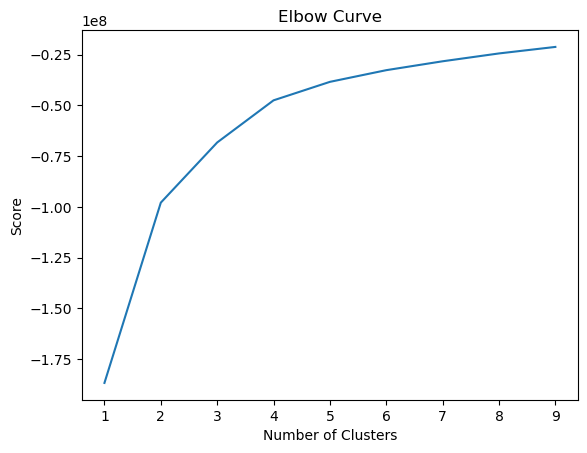

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Note** The optimal number of clusters suggested by this elbow plot is 3.

### 3. k-means clustering

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [37]:
# Fit the k-means object to the data.

kmeans.fit(df_subset2)

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
df_subset2['clusters']=kmeans.fit_predict(df_subset2)

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\AppData\Local\Temp\ipykernel_44748\1327649867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset2['clusters']=kmeans.fit_predict(df_subset2)


In [39]:
df_subset2.head()

,#_amenities,price,#_guests,#_reviews,review_scores_rating,clusters
0,8,25.0,1,186,4.67,1
1,9,45.0,1,30,4.23,0
7,8,110.0,1,11,5.00,0
8,11,110.0,1,10,4.67,0
16,9,110.0,2,1,5.00,0


In [40]:
df_subset2['clusters'].value_counts()

clusters
0    6851
1    1574
2    1234
Name: count, dtype: int64

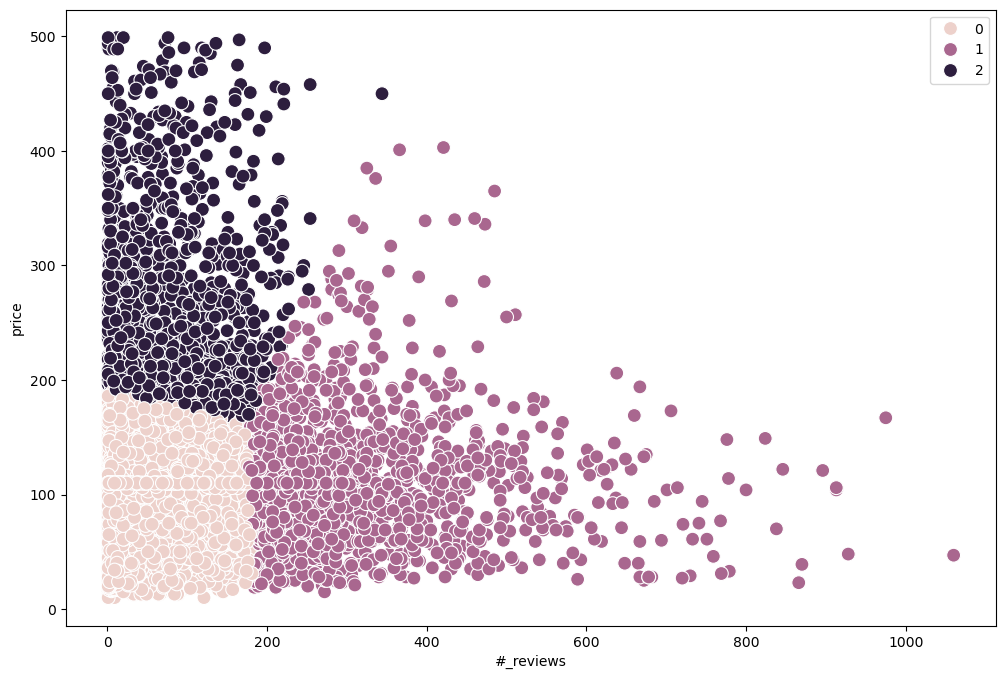

In [41]:
# Plot the clusters for the "price" and "#_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset2['#_reviews'], y=df_subset2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('#_reviews') # Label x-axis.
plt.ylabel('price') # Label y-axis.
pl.title('Number of reviews vs price clusters') # Adding a title
plt.show()

**Cluster 0 (light color)**: This cluster contains points mostly in the lower left of the plot, indicating listings with a lower number of reviews and lower prices.

**Cluster 1 (medium color)**: This cluster spreads across the middle of the plot. Listings in this cluster have varying numbers of reviews, and prices are relatively mid-range.

**Cluster 2 (dark color)** : This cluster appears at the top of the plot and to the left, representing listings with a higher price but fewer reviews.

**Insights:**

The clustering indicates that there are distinguishable groups of listings based on their review count and price.

The downward spread as the number of reviews increases suggests a possible negative relationship between the number of reviews and price. **High review counts could imply that lower-priced listings attract more customers, or that popular listings reduce prices to remain competitive.** ( makes sense as Airbnb visbility algorithm have a focus on the number of reviews received.)

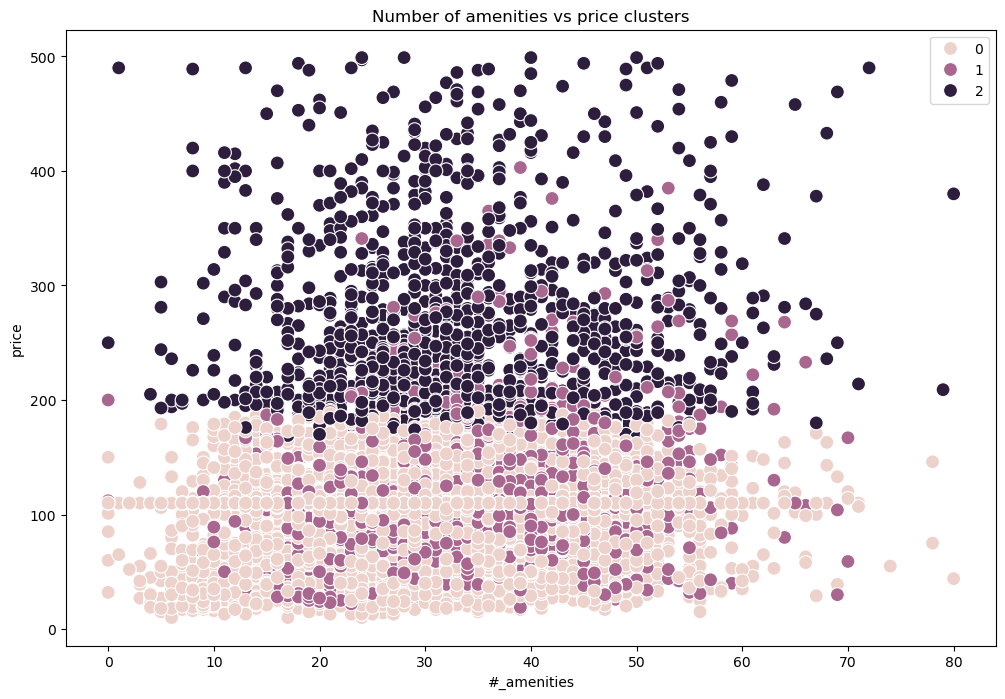

In [44]:
# Plot the clusters for the "price" and "#_amenities" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset2['#_amenities'], y=df_subset2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('#_amenities') # Label x-axis.
plt.ylabel('price') # Label y-axis.
pl.title('Number of amenities vs price clusters') # Adding a title
plt.show()

**Clusters**

**Cluster 0 (light color):**

* Most points in this cluster lie in the lower section of the plot (price < 150).
* Listings in this cluster tend to have a wide range of amenities, from very few to almost 80.
* This suggests that there is a subset of listings that are relatively low-priced regardless of the number of amenities they offer.
  
**Cluster 1 (medium color):**

* This cluster has a more scattered presence across different price ranges, but with a significant presence in the lower-middle price range (50 to 200).
* It covers a broad range of amenities as well, indicating that listings in this cluster vary greatly in terms of both price and amenities.
  
**Cluster 2 (dark color):**

* This cluster occupies the upper price range (200 to 500), indicating higher-priced listings.
* Listings in this cluster tend to have a moderate to high number of amenities.
* This suggests a possible trend that higher-priced listings usually offer more amenities, but there are still high-priced listings with fewer amenities.


**Insights:**

* Listings with Few Amenities: There are some listings with very few amenities priced very high, likely belonging to Cluster 2. This might indicate that factors other than amenities (such as location or uniqueness) contribute to higher prices.
* Listings with Many Amenities: Listings with a large number of amenities are distributed across different price points, suggesting that merely having more amenities does not guarantee a higher price.
* Density of Clusters: There is a higher density of Cluster 0 points (low price) at the bottom, showing that low-priced listings are the most common regardless of amenities offered.

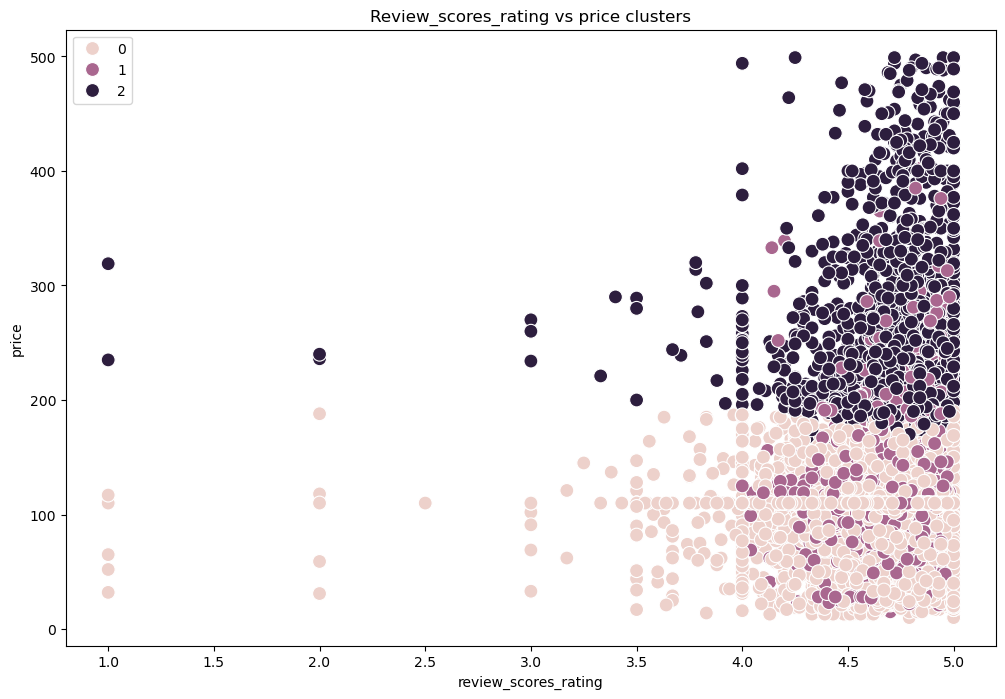

In [45]:
# Plot the clusters for the "price" and "review_scores_rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset2['review_scores_rating'], y=df_subset2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('review_scores_rating') # Label x-axis.
plt.ylabel('price') # Label y-axis.
pl.title('Review_scores_rating vs price clusters') # Adding a title
plt.show()

**Note**
* The scatterplot shows the impact of listings having a high review score rating and the impact on the pricing. 
* Airbnb considers review ratings as a sign of quality. Therefore the higher the rating the more listings. The density of the clusters start around 4.5 ( Airbnb has a 4.8 to be considered within their Superhost program, that are listings that have better visibility).
* Even though between 4.8 and 5 we can see the 3 clusters collinding the higher price increases significantly. 

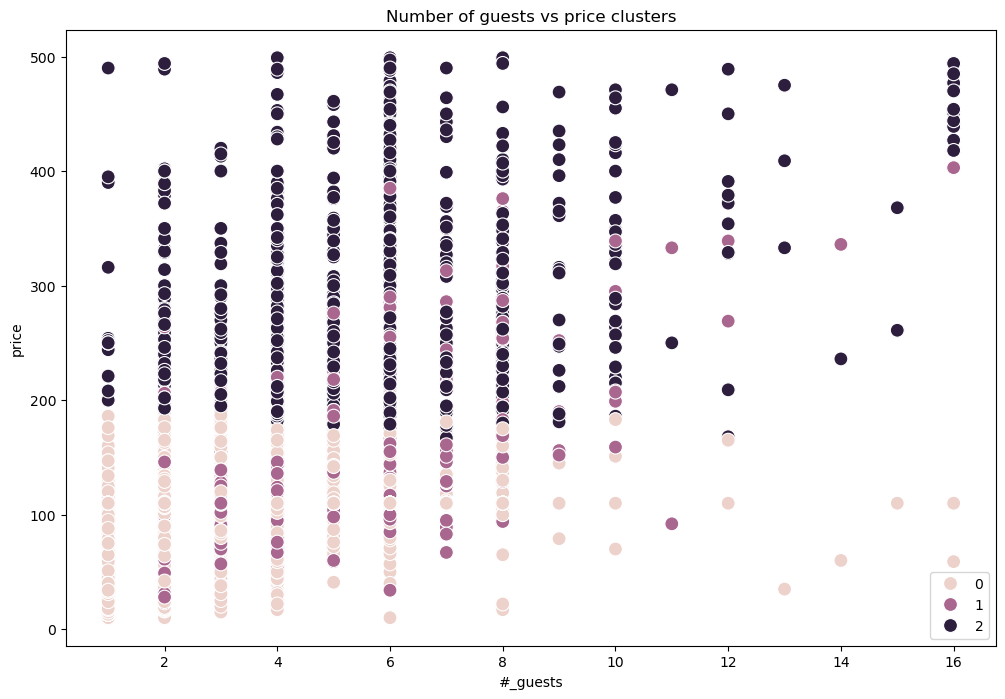

In [46]:
# Plot the clusters for the "price" and "#_guests" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset2['#_guests'], y=df_subset2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('#_guests') # Label x-axis.
plt.ylabel('price') # Label y-axis.
pl.title('Number of guests vs price clusters') # Adding a title
plt.show()

In [47]:
df_subset2.loc[df_subset2['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset2.loc[df_subset2['clusters'] == 1, 'cluster'] = 'purple'
df_subset2.loc[df_subset2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\carol\AppData\Local\Temp\ipykernel_44748\3268543654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset2.loc[df_subset2['clusters'] == 2, 'cluster'] = 'dark purple'


In [51]:
df_subset2.groupby('cluster').agg({'#_reviews':['mean', 'median'], 
                         '#_amenities':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'],
                                   '#_guests':['mean','median'],
                          'price':['mean', 'median']})

#_reviews        #_amenities        review_scores_rating         \
                   mean median        mean median                 mean median   
cluster                                                                         
dark purple   75.036467   59.0   33.085900   32.0             4.693955   4.76   
pink          47.635966   29.0   26.587214   26.0             4.694230   4.76   
purple       309.771919  275.0   33.660737   33.0             4.719835   4.76   

             #_guests              price         
                 mean median        mean median  
cluster                                          
dark purple  5.160454    5.0  266.111021  243.5  
pink         2.765874    2.0   97.873595  110.0  
purple       3.474587    3.0  110.714740  106.0